<a href="https://colab.research.google.com/github/josealvins/coderhouse-datascience-2/blob/main/Diabetes_Prediction_entrega1_Jos%C3%A9_Alvins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objetivo del Proyecto**

El objetivo de este análisis es investigar una variedad de factores relacionados con la salud y sus interconexiones para clasificar la diabetes con precisión. Estos factores incluyen aspectos como la edad, el sexo, el índice de masa corporal (IMC), la hipertensión, las enfermedades cardíacas, los antecedentes de tabaquismo, el nivel de HbA1c y el nivel de glucosa en sangre. Este examen exhaustivo no sólo proporcionará información sobre los patrones y tendencias del riesgo de diabetes, sino que también creará una base sólida para futuras investigaciones. Específicamente, se pueden desarrollar investigaciones sobre cómo estas variables interactúan e influyen en la aparición y progresión de la diabetes, conocimiento crucial para mejorar la atención al paciente y los resultados en esta área cada vez más crítica de la atención médica.

# **Diccionario de Variables**

1. Age (Edad): La edad es un factor importante para predecir el riesgo de diabetes. A medida que las personas envejecen, aumenta su riesgo de desarrollar diabetes. Esto se debe en parte a factores como la reducción de la actividad física, los cambios en los niveles hormonales y una mayor probabilidad de desarrollar otras afecciones de salud que pueden contribuir a la diabetes.

2. Gender (Genero): El género puede desempeñar un papel en el riesgo de diabetes, aunque el efecto puede variar. Por ejemplo, las mujeres con antecedentes de diabetes gestacional (diabetes durante el embarazo) tienen un mayor riesgo de desarrollar diabetes tipo 2 en el futuro. Además, algunos estudios han sugerido que los hombres pueden tener un riesgo ligeramente mayor de diabetes en comparación con las mujeres.

3. Body Mass Index (Índice de masa corporal): El IMC es una medida de grasa corporal basada en la altura y el peso de una persona. Se utiliza comúnmente como indicador del estado de peso general y puede ser útil para predecir el riesgo de diabetes. Un IMC más alto se asocia con una mayor probabilidad de desarrollar diabetes tipo 2. El exceso de grasa corporal, especialmente alrededor de la cintura, puede provocar resistencia a la insulina y afectar la capacidad del cuerpo para regular los niveles de azúcar en sangre.

4. Hypertension (Hipertension): La hipertensión, o presión arterial alta, es una afección que a menudo coexiste con la diabetes. Las dos condiciones comparten factores de riesgo comunes y pueden contribuir al desarrollo de cada una. Tener hipertensión aumenta el riesgo de desarrollar diabetes tipo 2 y viceversa. Ambas condiciones pueden tener efectos perjudiciales sobre la salud cardiovascular.

5. Heart Disease (Cardiopatia): Las enfermedades cardíacas, incluidas afecciones como la enfermedad de las arterias coronarias y la insuficiencia cardíaca, se asocian con un mayor riesgo de diabetes. La relación entre las enfermedades cardíacas y la diabetes es bidireccional, lo que significa que tener una condición aumenta el riesgo de desarrollar la otra. Esto se debe a que comparten muchos factores de riesgo comunes, como la obesidad, la presión arterial alta y el colesterol alto.

6. Smoking History (Historial de tabaquismo): El tabaquismo es un factor de riesgo modificable para la diabetes. Se ha descubierto que fumar cigarrillos aumenta el riesgo de desarrollar diabetes tipo 2. Fumar puede contribuir a la resistencia a la insulina y alterar el metabolismo de la glucosa. Dejar de fumar puede reducir significativamente el riesgo de desarrollar diabetes y sus complicaciones.

7. HbA1c Level (hemoglobina glucosilada): es una medida del nivel promedio de glucosa en sangre durante los últimos 2 a 3 meses. Proporciona información sobre el control del azúcar en sangre a largo plazo. Los niveles más altos de HbA1c indican un peor control glucémico y se asocian con un mayor riesgo de desarrollar diabetes y sus complicaciones.

8. Blood Glucose Level (Nivel de Glucosa en la Sangre): El nivel de glucosa en sangre se refiere a la cantidad de glucosa (azúcar) presente en la sangre en un momento dado. Los niveles elevados de glucosa en sangre, especialmente en ayunas o después de consumir carbohidratos, pueden indicar una regulación alterada de la glucosa y aumentar el riesgo de desarrollar diabetes. El control regular de los niveles de glucosa en sangre es importante en el diagnóstico y tratamiento de la diabetes.

# **Descripcion de la Entrega**

En el presente proyecto se explican detalladamente: objetivos del proyecto, diccionario de variables, hipotesis a evaluar, Data Analisis

Esta estructurado de la siguiente manera:

1- Input Data

Se importan las librerias de python necesarias y se hace la lectura de nuestro dataset.

2- Calidad de la data

En este paso se realizo limpieza de la data; manejo de duplicados, manejo de valores nulos. De igual manera se removieron valores innecesarios, puntualmente para la columna género donde el 0.00195% respondió como other.

3 - Descripcion de la Data

Una vez realizados los ajustes del paso anterior, se hace una descripcion de nuestro daframe.

4- Hipotesis a Evaluar

Con toda la informacion de nuestro dataframe, se procede a realizar todas las hipotesis que vamos a evaluar.

5 - Data Analisis

Con el uso de las librerias matplotlib y seaborn se ralizaron varios graficos para evaluar las hipotesis descritas.

# **Input Data**

In [1]:
# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import graphviz


#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading CSV File

url='https://raw.githubusercontent.com/josealvins/coderhouse-datascience-2/main/diabetes_prediction_dataset.csv'



#Dataframe
df= pd.read_csv(url,sep=',')


df_diabetes=df

df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **Calidad de la Data**

**Manejo de Duplicados**

In [3]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [4]:
df = df.drop_duplicates()

**Manejo de Valores Nulos**

In [5]:
#Valores Nulos

#Checking Null Values

print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


**Remover Valores innecesarios**

Removemos valores genero "other" los cuales representan un porcentaje muy bajo para propositos de este trabajo

In [6]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

# **Descripcion de la Data**

In [7]:
#Detalles de nuestro dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [6]:
df.describe().style.format("{:.2f}")


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


# **Hipotesis a Evaluar**


1. Relación entre el género y el riesgo de diabetes
2. Asociación entre la hipertensión y la diabetes
3. Comparación del índice de masa corporal (IMC) entre personas diabéticas y no diabéticas
4.Efecto del historial de tabaquismo en la diabetes
5. Nivel de glucosa en la sangre y hemoglobina glucosilada en personas diabéticas y no diabéticas

# **Data Analisis**

Procederemos a la realizacion de analisis, univariado, bivariado y multivariado para la posterior evaluacion analisis de hipotesis de nuestro proyecto

**- Analisis Univariado**

Procederemos a Analizar de manera grafica cada una de las variables utilizadas en este estudio

**1. Histograma Para Distribucion de edad**

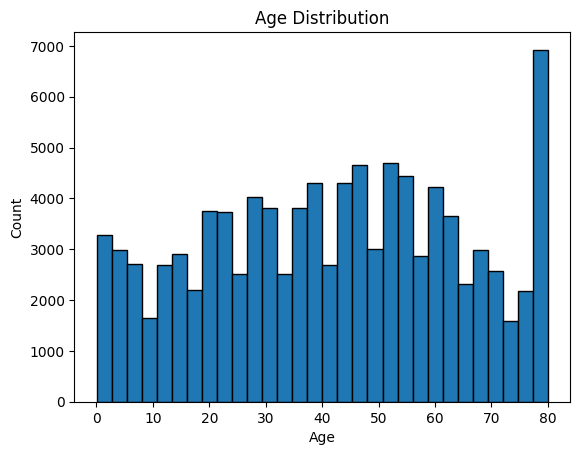

In [7]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



*   Diagnostico

La interpretacion de esté graficó nos muestra que hay una tendencia de distrbución de edad a personas entre 40, 50 y 80 años



**2. Bar plot para distribucion de genero**

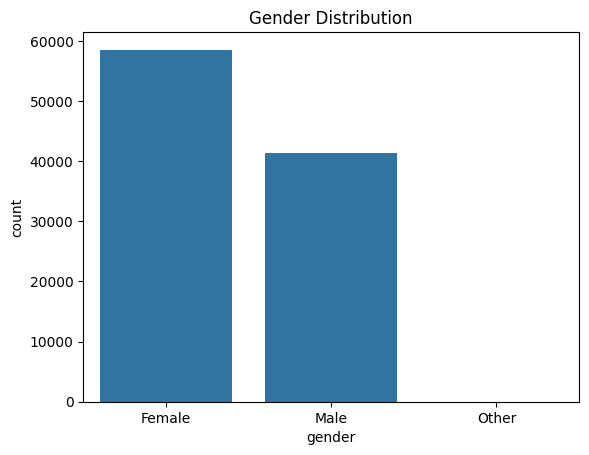

In [8]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()



*   Diagnostico

Del gráfico bar plot para género, podemos interpretar que la mayoria de las personas evaluadas en nuestro analisis, son de genero femenino



**3. Distribution Plot para BMI (Indice de Masa Corporal)**

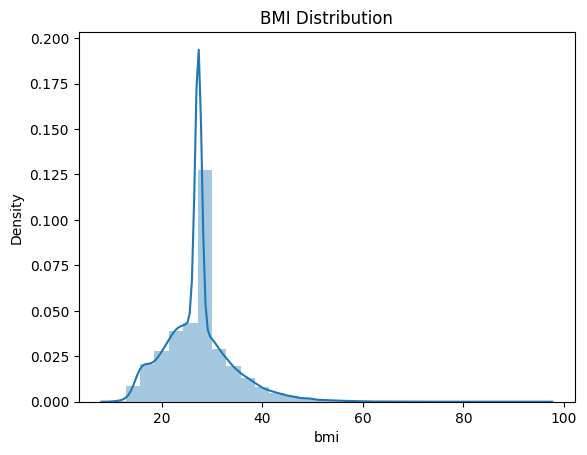

In [9]:

# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()




*   Diagnostico

En el gráfico distribution plot para BMI (Indice de Masa Corporal) se puede observar, que en el dataset evaluado el idice oscila entre 20 y 40 en mayor medida.


**4. Count plots para valores binarios (Hipertension, Cardiopatia, Diabetes)**

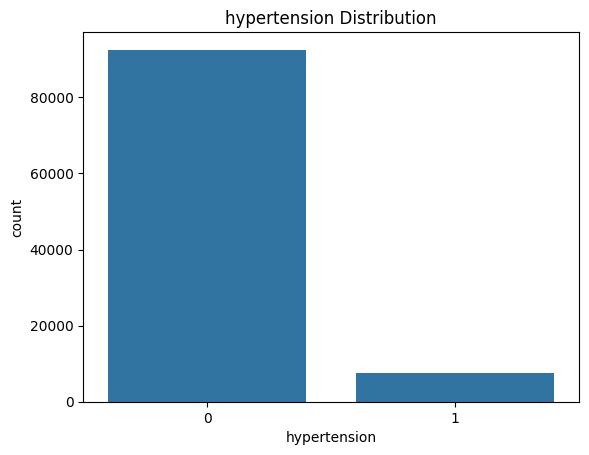

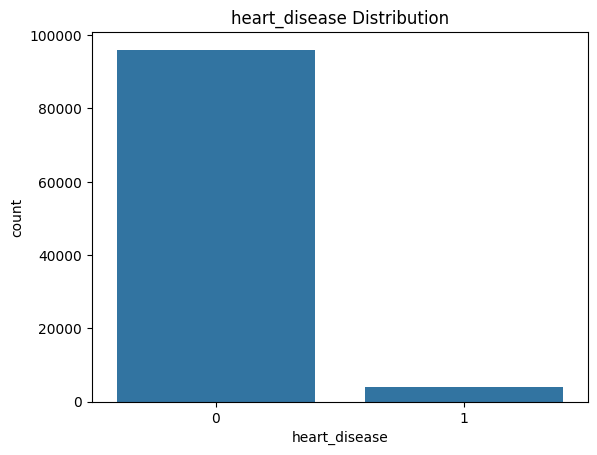

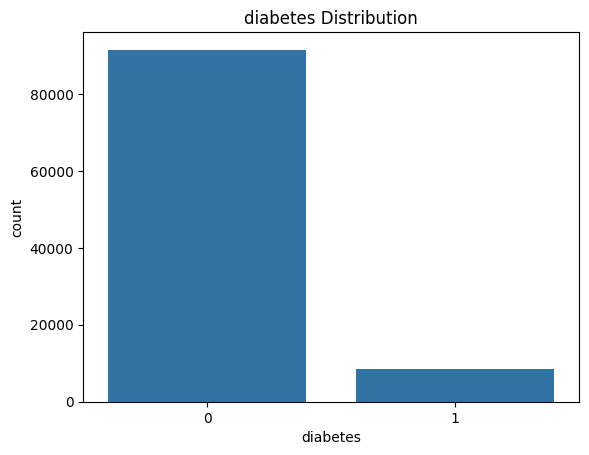

In [10]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()



*   Diagnostico

En los graficos plot para enfermedades del corazón se puede observar que estas condiciones de salud, no estan estrictamente condicionadas a diabetes.



**5. Count plot para historial de fumador**

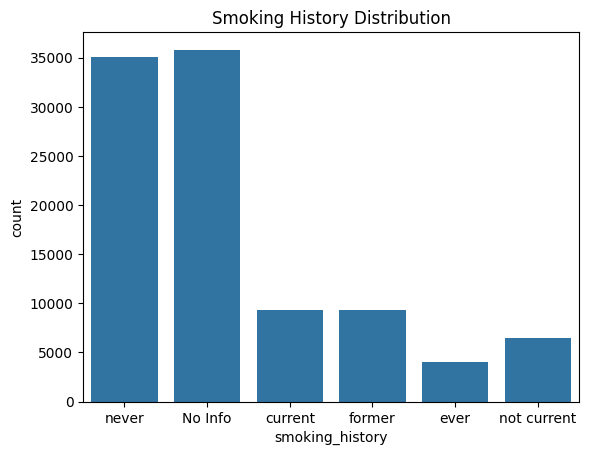

In [11]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()



*   Diagnostico

En el gráfico Count Plot para historial de fumador, podemos observar, por una amplia diferencia, las personas evaluadas en nuestro dataset son no fumadoras. Por lo cual podemos interpretar que si bien, el habito de fumar es perjudicial para la salud. No está estrechamente relacionado a la diabetes, o sea causante de esta.



**- Analisis Bivariado**

**1. Boxplot BMI (Indice Masa Corporal) vs Clasificacion de Diabetes**

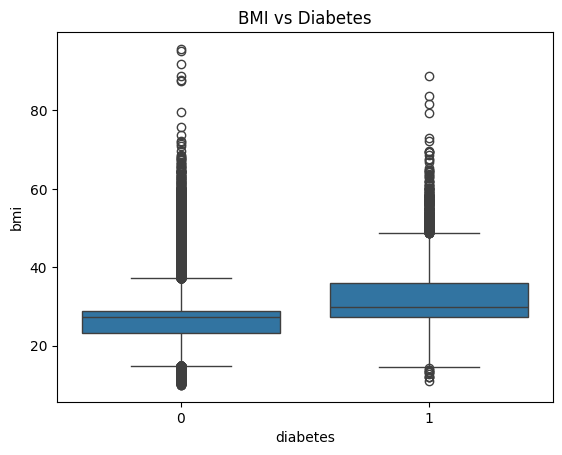

In [12]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()



*   Diagnostico

En el gráfico boxplot de analisis bivariado (Indice de Masa Corporal y Diabetes) se puede observar tendencia en indices de masa corporal mayor a 30 ser positivos en diabetes.

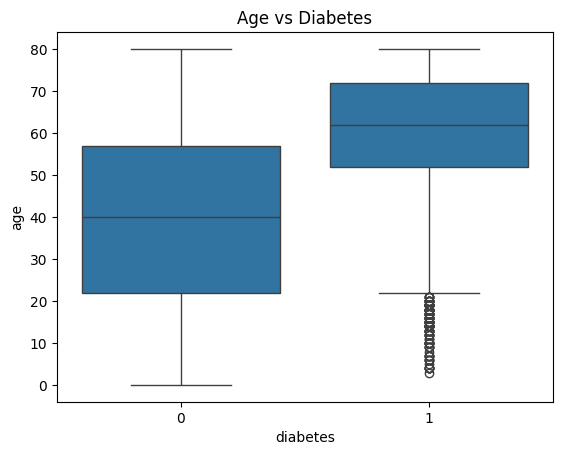

In [13]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()





*   Diagnostico

En el gráfico boxplot del analisis bivariado entre edad y diabetees, se puede observar que hay una tendencia de ser positivos en diabetes en edades mayores a 50 años.



**3. Count plot de genero vs diabetes**

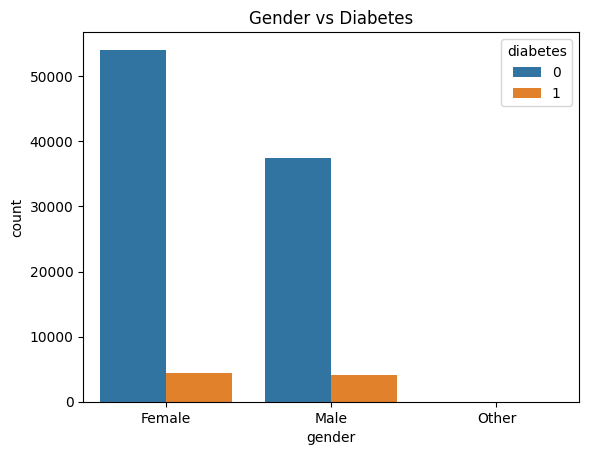

In [14]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()




*   Diagnostico

En el gráfico Count plot de variables genero y diabetes, se observa que hay una leve tendecia mayor a valores positivos de diabetes en género femenino.



4. Boxplot nivel HbA1c vs Clasificacion de Diabetes
**bold text**


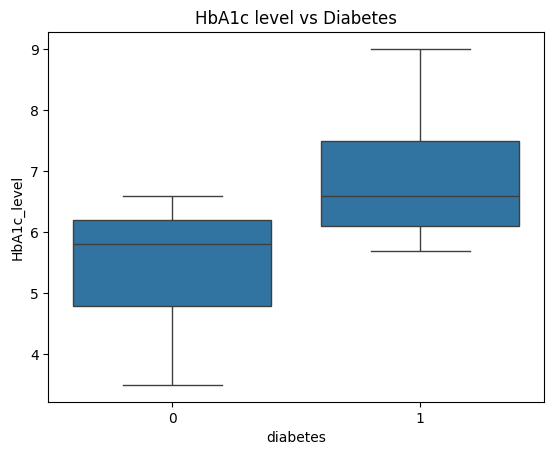

In [15]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()



*   Diagnostico

El gráfico boxplopt para hemoglobina glucosilada y diabetes se puede interpretar que para valores elevados de glucosa en la sangre (superiores a 5) se tiende a ser positivo en diabetes.



# **- Analisis Multivariado**

**1. Scatterplot Edad vs BMI (Indice de masa corporal) y Clasificacion de Diabetes**

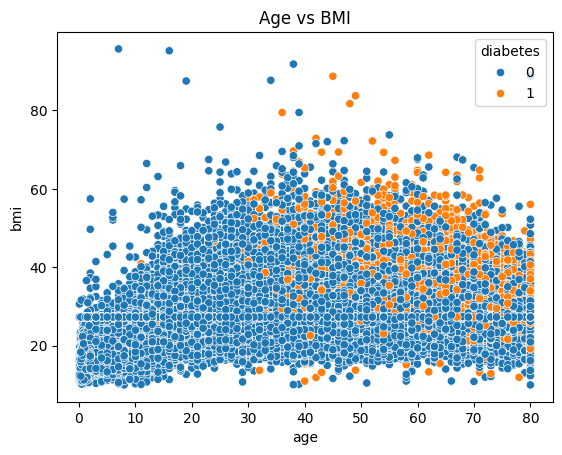

In [16]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

**2. Violin plot de BMI (Indice de masa corporal) vs Clasificacion de dibaetes dividido por genero**

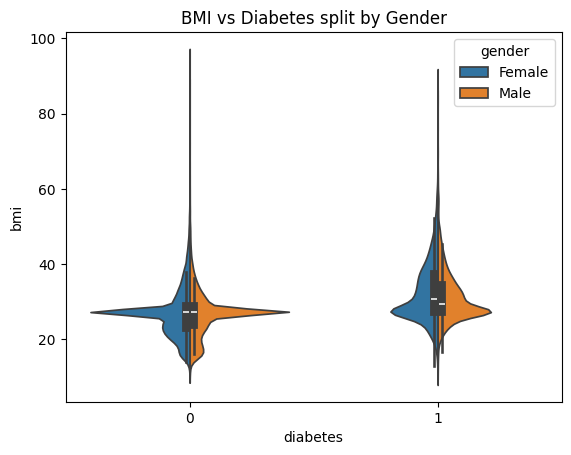

In [19]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()


- Diagnostico

En el diagrama violin plot de analisis multivariado para Indice de Masa Corporal, Diabetes y Genero. Se puede observar que para propositos de este estudio la mayoria de casos positivos de diabetes son en genero femenino, con indices de masa corporal mayor a 30.

**3. Interacción entre genero, Edad y diabetes**

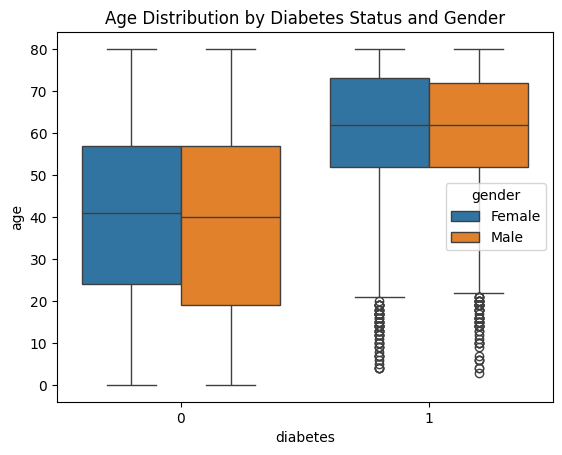

In [20]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

- Diagnostico

En el gráfico de Interacción entre genero edad y diabetes, para propositos de este estudio se puede observar que hay una tendencia de casos positivos mayormente en personas del sexo femenino.

**4.  Interacción entre Nivel de glucosa en la sangre, Diabetes y género**

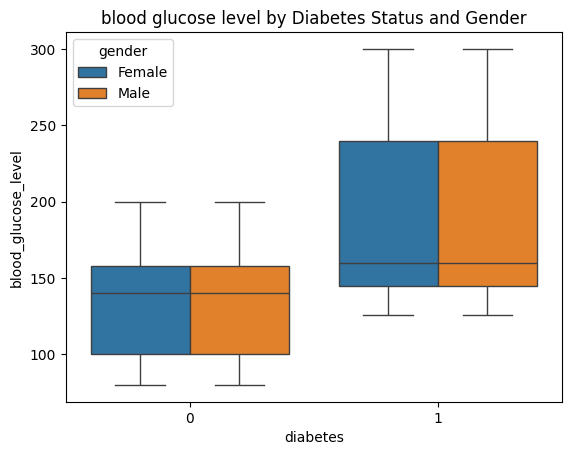

In [21]:
sns.boxplot(x='diabetes', y='blood_glucose_level', hue='gender', data=df)
plt.title('blood glucose level by Diabetes Status and Gender')
plt.show()

- Diagnostico

Para el gráfico boxplot de comparacion entre nivel de glucosa en la sangre, Diabetes y género; podemos observar que para genero masculino y femenino valores de niveles de glucosa en la sangre superiores a 150 son positivos para diabetes.

**5. Interacción entre nivel de HbA1c, diabetes y género**

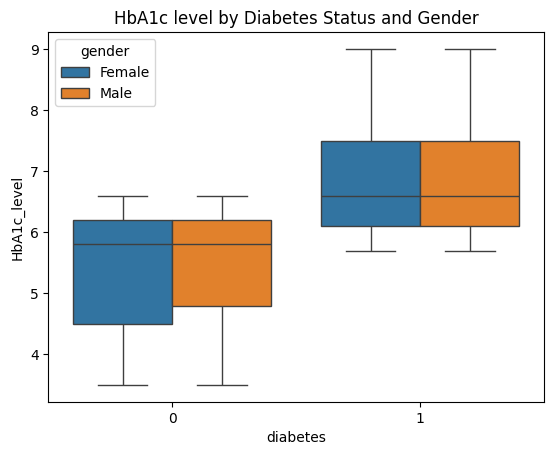

In [22]:
sns.boxplot(x='diabetes', y='HbA1c_level', hue='gender', data=df)
plt.title('HbA1c level by Diabetes Status and Gender')
plt.show()

- Diagnostico

En el gráfico de interaccion entre nivel HbA1c diabetes y género se puede observar que en valores HbA1c mayores e iguales a 6 son positivos para diabetes en ambos generos.

# **- Evaluacion de Hipotesis**

Realizado nuestro analisis previo obtuvimos los siguientes insigths

1- Hay una tendencia de positivos de diabetes mayormente en genero femenino que masculino

2- las enfermedades del corazon no tienen gran influencia en contraer diabetes

3- Hay una tendencia a indices de masa corporal mayores a 30 para positivos de diabetes

4- Si bien el tabaquismo es nocivo para la salud no se encuentra relacion directa entre este habito y contraer diabetes

5- Valores de nivel glucosa en la sangre y hemoglobina glucosilada elevados son determinantes en ser positivo para diabetes.